In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [2]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'leap': {'10': [0.02555227279663086, 0.02809309959411621, 0.02536916732788086, 0.027379751205444336, 0.028225183486938477, 0.02673053741455078, 0.02808547019958496, 0.02786397933959961, 0.02788376808166504, 0.02734518051147461, 0.027474164962768555, 0.026384830474853516, 0.027012109756469727, 0.027395963668823242, 0.027569293975830078, 0.02741694450378418, 0.027679920196533203, 0.027841806411743164, 0.027318954467773438, 0.032323360443115234, 0.028037071228027344, 0.02692556381225586, 0.027094364166259766, 0.02723383903503418, 0.0263671875, 0.026576995849609375, 0.02653217315673828, 0.026355743408203125, 0.02610015869140625, 0.026886940002441406, 0.028355836868286133, 0.02722907066345215, 0.026333332061767578, 0.026440858840942383, 0.02601933479309082, 0.026871919631958008, 0.027758121490478516, 0.027644872665405273, 0.02731609344482422, 0.027737855911254883, 0.028191804885864258, 0.027852535247802734, 0.027704715728759766, 0.027457475662231445, 0.027942180633544922, 0.027287721633911

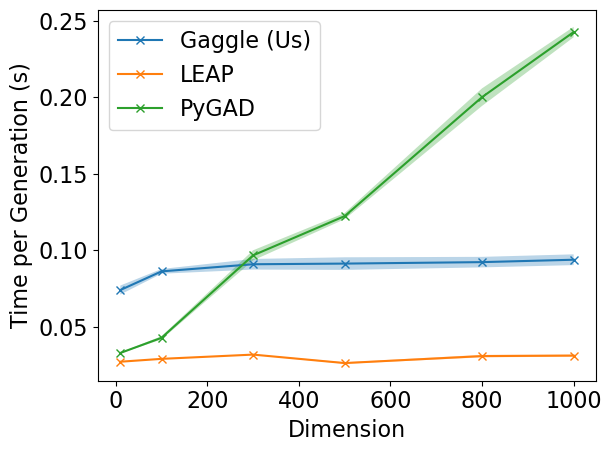

<Figure size 640x480 with 0 Axes>

In [3]:
dimesions = [10, 100, 300, 500, 800, 1000]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP', 'pygad': 'PyGAD'}
for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in dimesions]
    lower = [result[str(x)][1] for x in dimesions]
    upper = [result[str(x)][2] for x in dimesions]
    plt.plot(dimesions, values, label=nice_names[algorithm], marker='x')
    plt.fill_between(dimesions, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Dimension")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/rast_plot.pdf', bbox_inches='tight')
plt.show()
plt.clf()